In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
scale = 34

In [3]:
from os import walk
filelist = []
filepath = 'D:/data/20190718/'
for root, dirs, files in walk(filepath):
    for file in files:
        if '_trackinfo' in file:
            print(file)
            filelist.append(filepath + file)

A_nPVP0125-2cc+m-1cc_hom1_trackinfo.pkl
A_nPVP0125-2cc+m-1cc_hom2_trackinfo.pkl
A_nPVP0125-2cc+m-1cc_hom3_trackinfo.pkl
A_nPVP0125-2cc+m-1cc_side1_trackinfo.pkl
A_nPVP0125-2cc+m-1cc_side2_trackinfo.pkl
A_nPVP0125-2cc+m-1cc_side3_trackinfo.pkl
A_nPVP025-2cc+m-1cc_hom1_trackinfo.pkl
A_nPVP025-2cc+m-1cc_hom2_trackinfo.pkl
A_nPVP025-2cc+m-1cc_hom3_trackinfo.pkl
A_nPVP025-2cc+m-1cc_side1_trackinfo.pkl
A_nPVP025-2cc+m-1cc_side2_trackinfo.pkl
A_nPVP025-2cc+m-1cc_side3_trackinfo.pkl
A_nPVP05-2cc+m-1cc_hom1_trackinfo.pkl
A_nPVP05-2cc+m-1cc_hom2_trackinfo.pkl
A_nPVP05-2cc+m-1cc_hom3_trackinfo.pkl
A_nPVP05-2cc+m-1cc_side1_trackinfo.pkl
A_nPVP05-2cc+m-1cc_side2_trackinfo.pkl
A_nPVP05-2cc+m-1cc_side3_trackinfo.pkl


In [4]:
dump_idx = list(range(0,19,3))

In [5]:
idx_1 = dump_idx[0:6]
idx_2 = dump_idx[1:7]

In [6]:
meanR_all = []
meanV_all = []
for idx_a,idx_b in zip(idx_1,idx_2):
    print(idx_a,idx_b)
    meanR = []
    meanV = []
    for infofile in filelist[idx_a:idx_b]:
        print(infofile)
        trackinfo = pd.read_pickle(infofile)
        filterinfo = trackinfo.loc[(trackinfo['IDcounts'] >= 200)].loc[(trackinfo['maxmove'] >= 50)].sort_values(by='IDcounts',ascending=False)
        meanR.append(filterinfo['meanR'].values/scale*1000)
        meanV.append(filterinfo['meanV'].values/scale*1000*25)
    meanR_all.append(meanR)
    meanV_all.append(meanV)

0 3
D:/data/20190718/A_nPVP0125-2cc+m-1cc_hom1_trackinfo.pkl
D:/data/20190718/A_nPVP0125-2cc+m-1cc_hom2_trackinfo.pkl
D:/data/20190718/A_nPVP0125-2cc+m-1cc_hom3_trackinfo.pkl
3 6
D:/data/20190718/A_nPVP0125-2cc+m-1cc_side1_trackinfo.pkl
D:/data/20190718/A_nPVP0125-2cc+m-1cc_side2_trackinfo.pkl
D:/data/20190718/A_nPVP0125-2cc+m-1cc_side3_trackinfo.pkl
6 9
D:/data/20190718/A_nPVP025-2cc+m-1cc_hom1_trackinfo.pkl
D:/data/20190718/A_nPVP025-2cc+m-1cc_hom2_trackinfo.pkl
D:/data/20190718/A_nPVP025-2cc+m-1cc_hom3_trackinfo.pkl
9 12
D:/data/20190718/A_nPVP025-2cc+m-1cc_side1_trackinfo.pkl
D:/data/20190718/A_nPVP025-2cc+m-1cc_side2_trackinfo.pkl
D:/data/20190718/A_nPVP025-2cc+m-1cc_side3_trackinfo.pkl
12 15
D:/data/20190718/A_nPVP05-2cc+m-1cc_hom1_trackinfo.pkl
D:/data/20190718/A_nPVP05-2cc+m-1cc_hom2_trackinfo.pkl
D:/data/20190718/A_nPVP05-2cc+m-1cc_hom3_trackinfo.pkl
15 18
D:/data/20190718/A_nPVP05-2cc+m-1cc_side1_trackinfo.pkl
D:/data/20190718/A_nPVP05-2cc+m-1cc_side2_trackinfo.pkl
D:/data/20

In [7]:
meanR_out = []
meanV_out = []
for dumpR,dumpV in zip(meanR_all,meanV_all):
    meanR_out.append(np.concatenate(dumpR).ravel())
    meanV_out.append(np.concatenate(dumpV).ravel())

In [9]:
meanV_out[0]

array([746.66547118, 382.79658762, 702.48151327, 526.81312657,
       917.5594028 , 641.11200352, 849.02065898, 737.83866248,
       823.63776825, 868.07185876, 633.00081503, 519.22231844,
       902.48038304, 890.75731522, 747.95011694, 447.35052733,
       398.91474886, 223.36173919, 317.78867446, 395.62920182,
       523.67240182, 668.14380797, 727.58840066, 571.21516576,
       664.85585696, 882.55407206, 905.97145747, 793.98630966,
       792.99210497, 453.61698369, 657.86301377, 418.79792702,
       477.00906347, 648.33584438, 654.53620147, 314.24328247,
       423.93149769, 451.06494048, 287.36416537, 355.03610015,
       604.56074948, 604.24562198, 816.68235829, 972.53517224,
       805.91947547, 767.14313621, 767.16454422, 864.54502066,
       931.7090968 , 472.01275474, 497.17418026, 759.46293249,
       911.15658612, 318.32663577, 582.30607343, 453.47243021,
       320.41514833, 659.18270003, 728.30530452, 712.97318681,
       347.42316945, 835.13883698, 453.09320175, 853.56

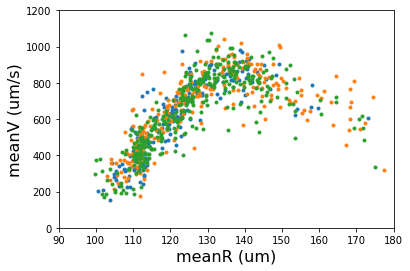

In [18]:
plt.plot(meanR_out[0],meanV_out[0],'.')
plt.plot(meanR_out[2],meanV_out[2],'.')
plt.plot(meanR_out[4],meanV_out[4],'.')
plt.xlim([90,180])
plt.ylim([0,1200])
plt.xlabel('meanR (um)', fontsize=16)
plt.ylabel('meanV (um/s)', fontsize=16)
plt.show()   

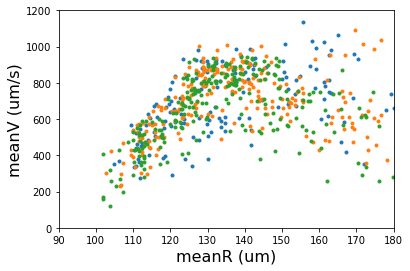

In [19]:
plt.plot(meanR_out[1],meanV_out[1],'.')
plt.plot(meanR_out[3],meanV_out[3],'.')
plt.plot(meanR_out[5],meanV_out[5],'.')
plt.xlim([90,180])
plt.ylim([0,1200])
plt.xlabel('meanR (um)', fontsize=16)
plt.ylabel('meanV (um/s)', fontsize=16)
plt.show()   